In [1]:
import xarray as xr
import proplot as pplt
import pandas as pd
import numpy as np
from AOSCMcoupling.files import OIFSPreprocessor

In [2]:
start_date = pd.Timestamp("2014-07-01")
oifs_preprocessor = OIFSPreprocessor(
    start_date, np.timedelta64(-7, "h")
)
max_schwarz_iters = 20
oifs_diagvars_add_swz = []
for iter in range(1, max_schwarz_iters + 1):
    oifs_diagvars_add_swz.append(
        xr.open_mfdataset(
            f"output/CEXS_{iter}/diagvar.nc",
            preprocess=oifs_preprocessor.preprocess,
        )
    )

oifs_progvars_add_swz = []
for iter in range(1, max_schwarz_iters + 1):
    oifs_progvars_add_swz.append(
        xr.open_mfdataset(
            f"output/CEXS_{iter}/progvar.nc",
            preprocess=oifs_preprocessor.preprocess,
        )
    )

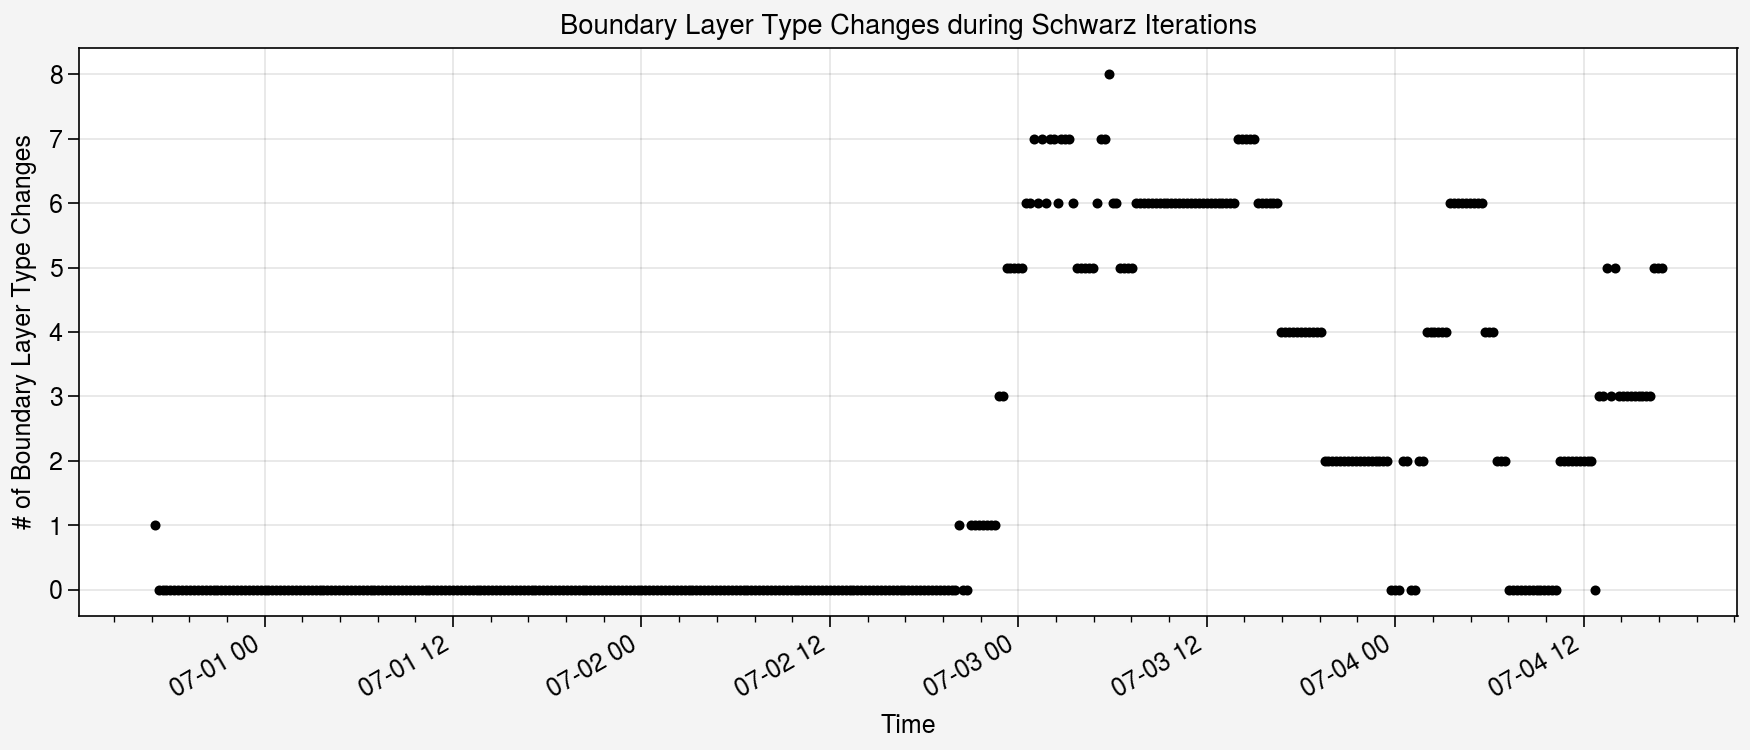

In [3]:
pbl_type_changes = oifs_diagvars_add_swz[0].pbl_type.copy()
pbl_type_changes.data[:] = 0
pbl_types = [oifs_diagvar.pbl_type for oifs_diagvar in oifs_diagvars_add_swz]

fig, ax = pplt.subplots(width="70em", height="30em")
previous_pbl_type = pbl_types[0]
type_changes_over_iters = []
for iter in range(1, max_schwarz_iters):
    pbl_type = pbl_types[iter]
    pbl_type_not_equal = np.where(pbl_type.data != previous_pbl_type.data)
    type_changes_over_iters.append(len(pbl_type_not_equal[0].compute()) / 385)
    pbl_type_changes.data[pbl_type_not_equal] += 1
    previous_pbl_type = pbl_type
ax.scatter(
    pbl_type_changes,
    color="k",
    marker=".",
)
ax.format(
    ylabel="# of Boundary Layer Type Changes",
    ytickminor=False,
    title="Boundary Layer Type Changes during Schwarz Iterations",
    xlabel="Time",
    xrotation=30,
)

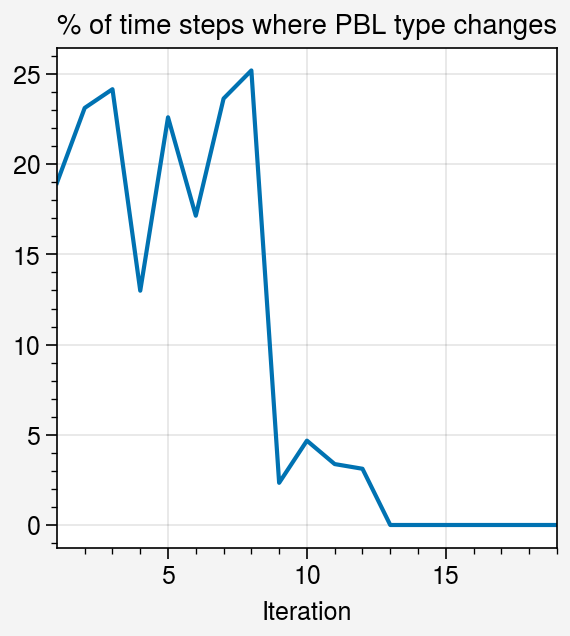

In [4]:
fig, ax = pplt.subplots()
ax.plot(list(range(1, 20)), 100 * np.array(type_changes_over_iters))
ax.format(
    title="% of time steps where PBL type changes",
    xlabel="Iteration"
)

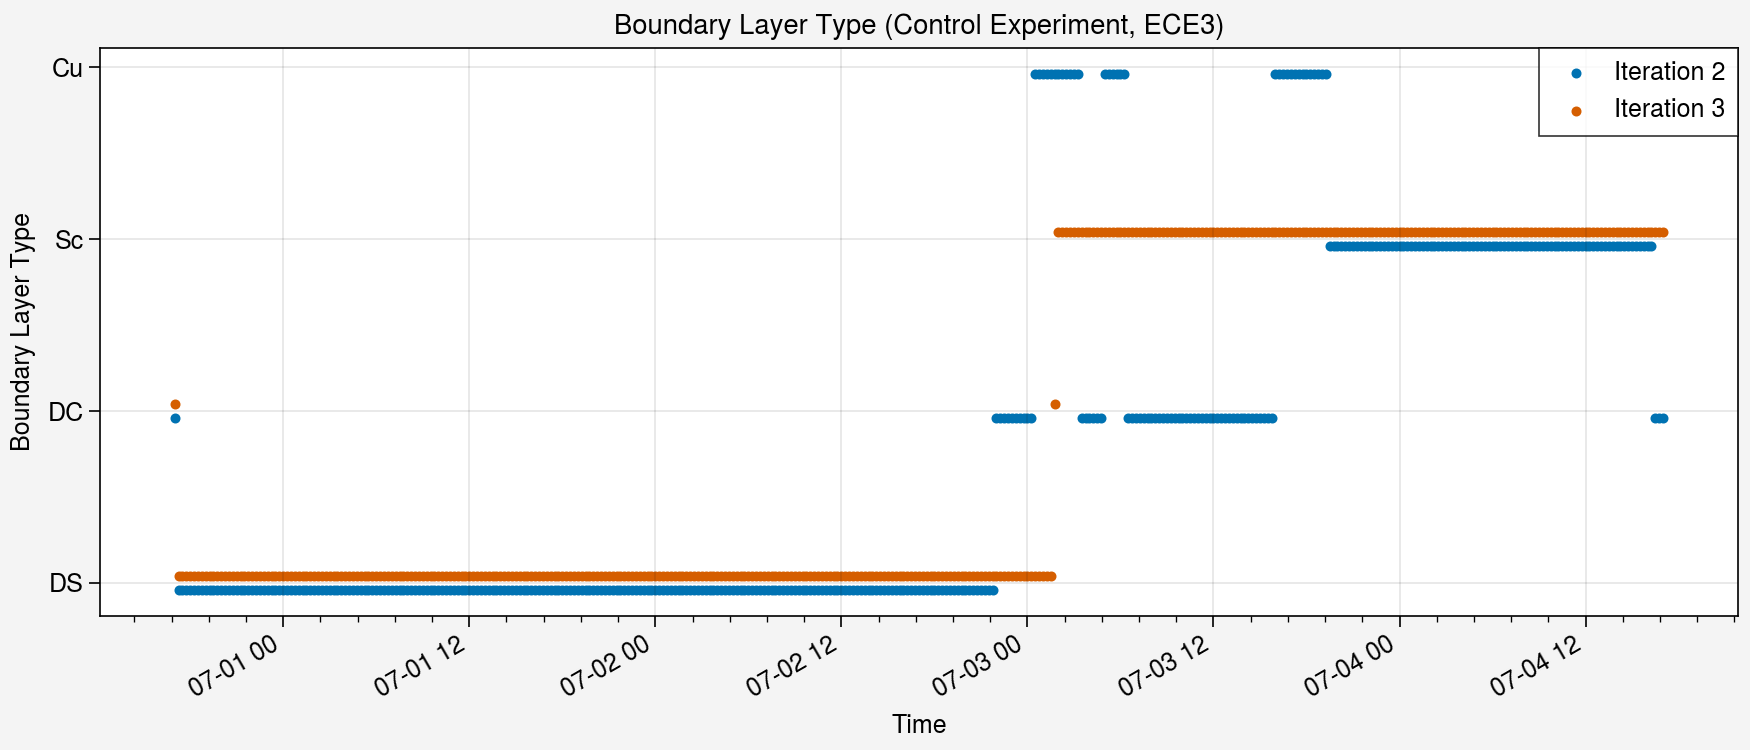

In [5]:
fig, ax = pplt.subplots(width="70em", height="30em")

labels = ["parallel", "atmosphere-first", "ocean-first", "converged SWR"]
shifts = [-0.04, 0.04]
for i in range(2):
    base_iteration = 2
    oifs_diagvar = oifs_diagvars_add_swz[base_iteration - 1 + i]
    ax.scatter(
        oifs_diagvar.pbl_type + shifts[i],
        marker=".",
        label=f"Iteration {base_iteration + i}",
    )
ax.format(
    title="Boundary Layer Type (Control Experiment, ECE3)",
    ylabel="Boundary Layer Type",
    yticks=[0, 1, 2, 3],
    yticklabels=["DS", "DC", "Sc", "Cu"],
    ytickminor=False,
    xrotation=30,
    xlabel="Time",
)
ax.legend(ncol=1)

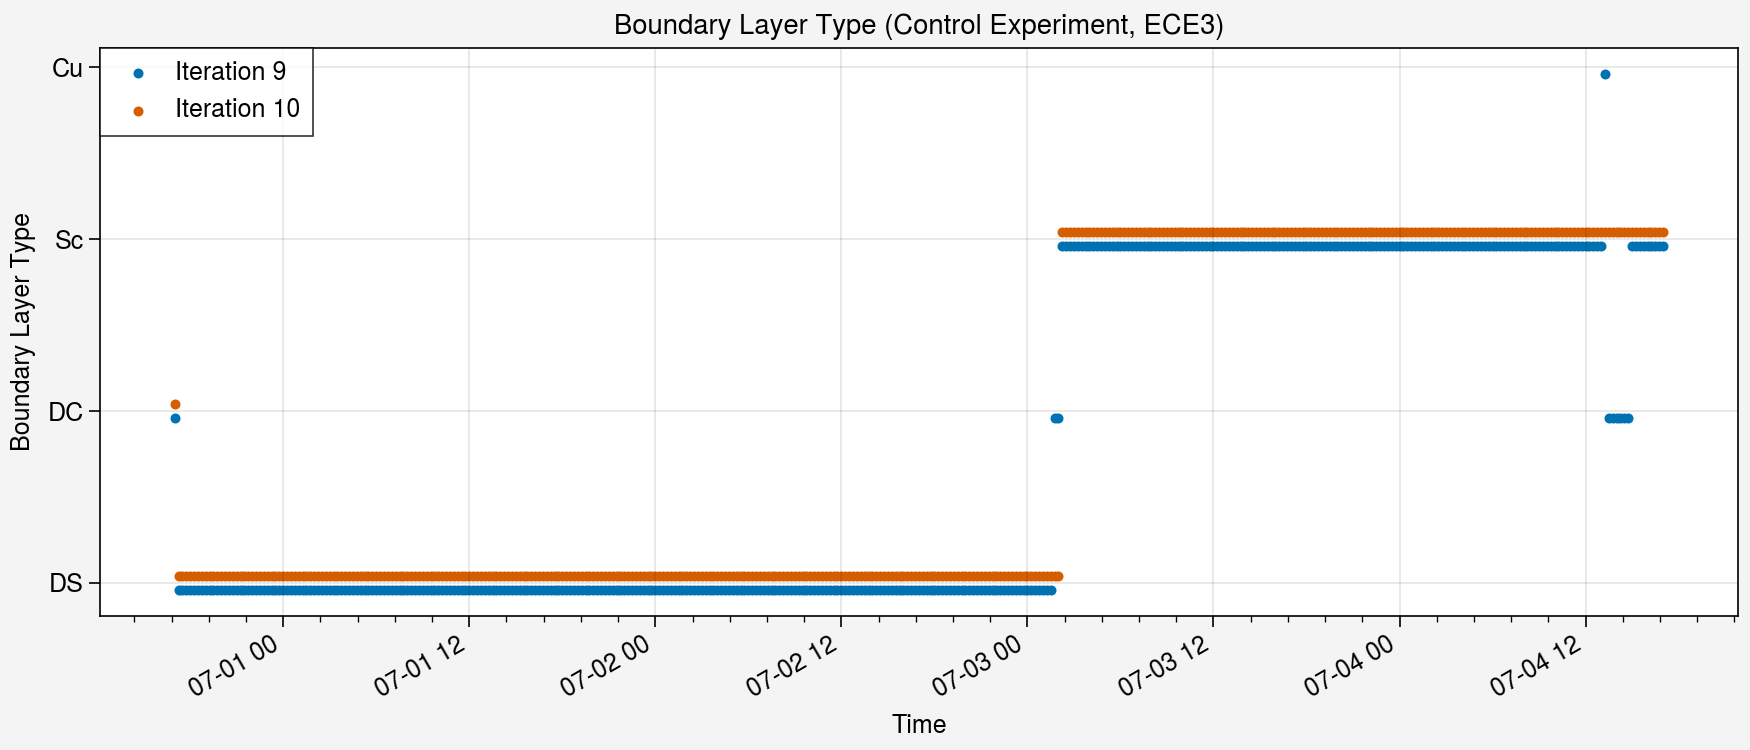

In [6]:
fig, ax = pplt.subplots(width="70em", height="30em")

labels = ["parallel", "atmosphere-first", "ocean-first", "converged SWR"]
shifts = [-0.04, 0.04]
for i in range(2):
    base_iteration = 9
    oifs_diagvar = oifs_diagvars_add_swz[base_iteration - 1 + i]
    ax.scatter(
        oifs_diagvar.pbl_type + shifts[i],
        marker=".",
        label=f"Iteration {base_iteration + i}",
    )
ax.format(
    title="Boundary Layer Type (Control Experiment, ECE3)",
    ylabel="Boundary Layer Type",
    yticks=[0, 1, 2, 3],
    yticklabels=["DS", "DC", "Sc", "Cu"],
    ytickminor=False,
    xrotation=30,
    xlabel="Time",
)
ax.legend(ncol=1)

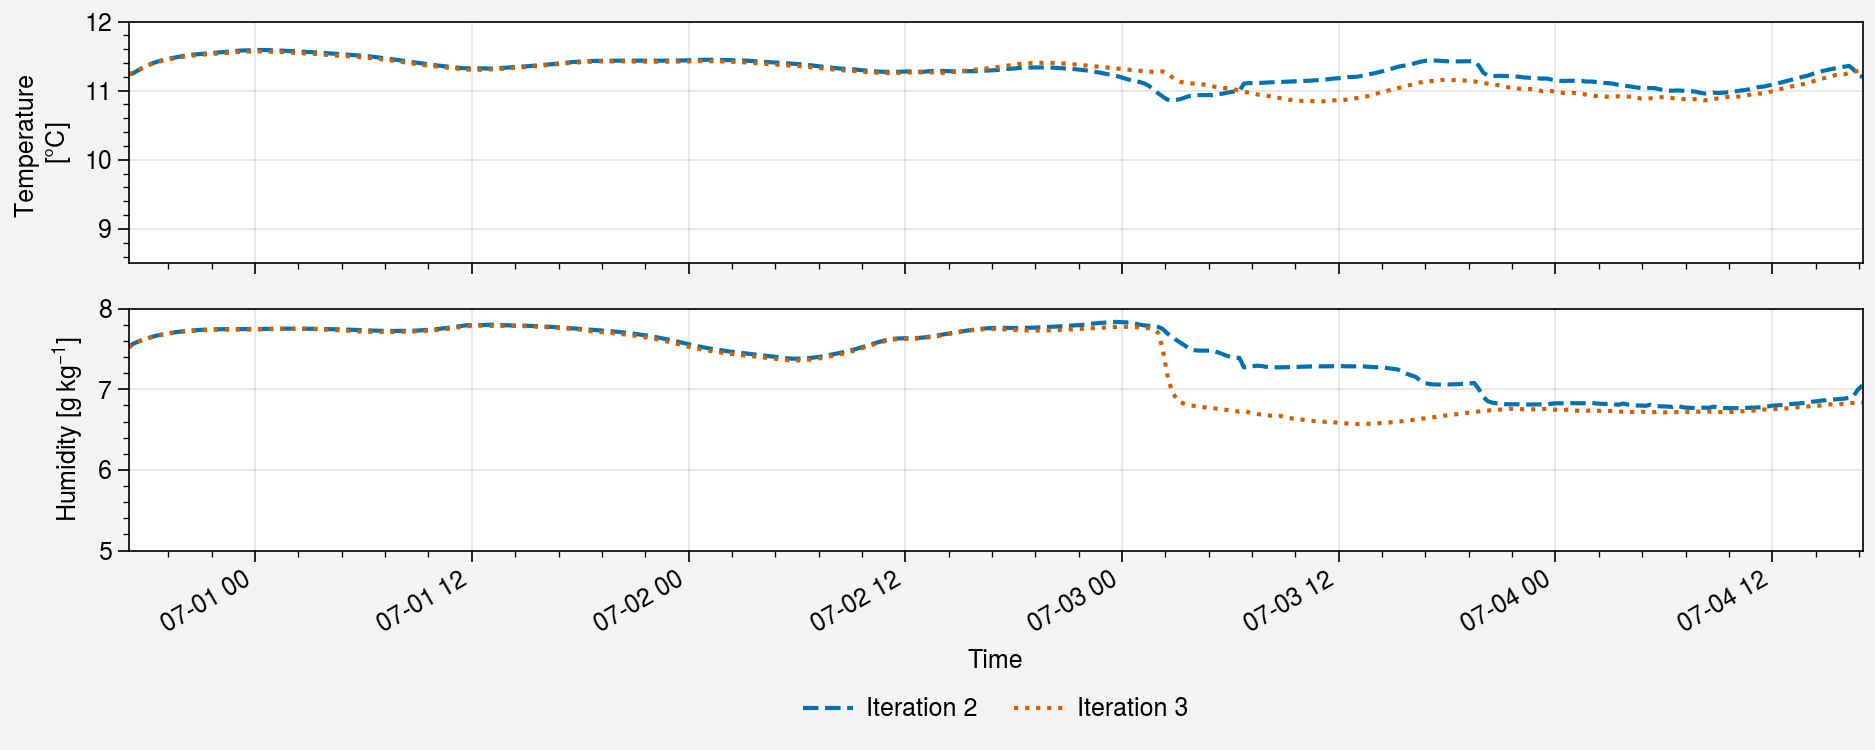

In [7]:
fig, axs = pplt.subplots(nrows=2, spany=False, height="30em", width="75em")
linestyles = ["--", ":"]

base_iteration = 2
ax = axs[0]
for i in range(2):
    ax.plot(
        oifs_progvars_add_swz[base_iteration + i - 1].t.sel(nlev=60) - 273.15,
        label=f"Iteration {base_iteration + i}",
        ls=linestyles[i],
    )
ax.format(ylabel="Temperature \n$[°C]$", title="", xlabel="Time", ylim=[8.5, 12],)

hs = []
ax = axs[1]
for i in range(2):
    h = ax.plot(
        oifs_progvars_add_swz[base_iteration + i - 1].q.sel(nlev=60) * 1e3,
        label=f"Iteration {base_iteration + i}",
        ls=linestyles[i],
    )
    hs.append(h)
ax.format(
    ylabel="Humidity $[g\; kg^{{-1}}]$",
    title="",
    xlabel="Time",
    xrotation=30,
    ylim=[5,8],
)

fig.legend(hs, ncols=4, frame=False, loc="b")

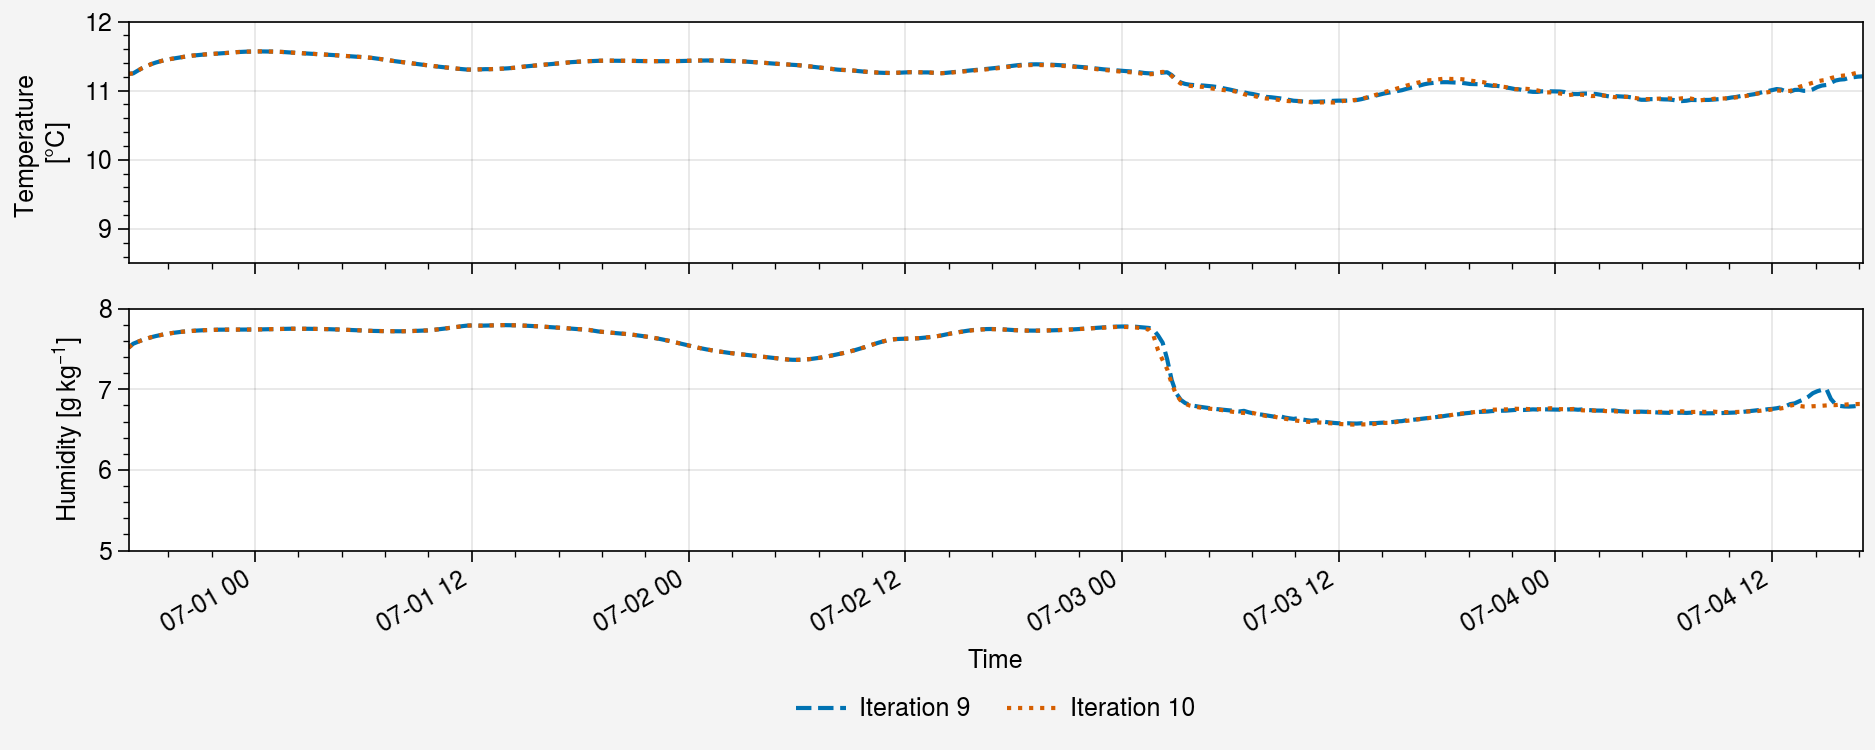

In [8]:
fig, axs = pplt.subplots(nrows=2, spany=False, height="30em", width="75em")
linestyles = ["--", ":"]

base_iteration = 9
ax = axs[0]
for i in range(2):
    ax.plot(
        oifs_progvars_add_swz[base_iteration + i - 1].t.sel(nlev=60) - 273.15,
        label=f"Iteration {base_iteration + i}",
        ls=linestyles[i],
    )
ax.format(ylabel="Temperature \n$[°C]$", title="", xlabel="Time", ylim=[8.5, 12],)

hs = []
ax = axs[1]
for i in range(2):
    h = ax.plot(
        oifs_progvars_add_swz[base_iteration + i - 1].q.sel(nlev=60) * 1e3,
        label=f"Iteration {base_iteration + i}",
        ls=linestyles[i],
    )
    hs.append(h)
ax.format(
    ylabel="Humidity $[g\; kg^{{-1}}]$",
    title="",
    xlabel="Time",
    xrotation=30,
    ylim=[5,8],
)

fig.legend(hs, ncols=4, frame=False, loc="b")